<a href="https://colab.research.google.com/github/kmotohas/shuwa-book-dl4prac-examples/blob/master/notebooks/chap02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第二章 畳み込みニューラルネットワークと画像認識

ディープラーニングの応用のうち、画像に対するアプリケーションとしてもっとも優れた成果を上げている分野は画像認識だと言えるでしょう。本章では画像認識に用いられる畳み込みニューラルネットワークの基本的な仕組みと代表的なアーキテクチャについて学んでいきます。

## 2.1 画像認識とは

画像認識は、パターン認識技術の１つで、カメラやビデオの画像に写っているモノや人の顔などのオブジェクトやそのオブジェクトの特徴である形、色、数などを認識する技術のことです。本節では画像認識の利用シーンをイメージできる情報を提供します。

###画像認識のさまざまなアプリケーション

画像認識を利用したアプリケーションとしては、のちほど紹介するYOLOというアルゴリズムに代表される一般物体認識のほかに、顔認識、年齢推定などがあります。さらに応用的な話でいうと、ひびが入っているのかを見つけるような老朽箇所の検知であったり、一般物体認識のようにボックスで物体を認識するのではなく、画像のピクセルごとにクラスの分類を行うセグメンテーションという分野でも用いられています。また文字認識という領域の基礎的な技術としても畳み込みニューラルネットワークが使われています。

![cv_app](https://github.com/kmotohas/shuwa-book-dl4prac-examples/blob/master/notebooks/figures/chap02_cv_app.png?raw=1)
<center>画像認識アプリケーションの例</center>

### 畳み込みニューラルネットワークとは

そもそも畳み込みとは、ある関数に対して別の関数を平行移動させながら重ねて足し合わせる演算のことを指す数学用語です。現状ディープラーニングでは、画像認識に最も適したアーキテクチャーが畳み込みニューラルネットワークで、その名の通り畳み込み処理を用いています。ここではニューラルネットワークにおける畳み込み処理の仕組みと動作について理解を深めることで畳み込みニューラルネットワークの基本を押さえましょう。

### 畳み込みニューラルネットワークの仕組み

下図を使って畳み込みの基本的な説明をします。図の真ん中の行列が左の人物の画像の耳の部分のピクセルの画素値になります。図の例ではカラー（3チャンネル）の画像になっていますが、以下の説明では説明を簡単にするために、グレースケール（1チャンネル）の画像と仮定して話を進めます。

畳み込みでは、畳み込みフィルターだとかカーネルなどと呼ばれる、画像の一定の範囲の特徴を把握するための行列を用意します。図の真ん中のピクセルとその周りの関連性を知るために準備した畳み込みフィルターを使って畳み込みと呼ばれる行列計算を行います。

![conv](https://github.com/kmotohas/shuwa-book-dl4prac-examples/blob/master/notebooks/figures/chap02_conv.png?raw=1)
<center>二次元の畳み込み計算の定義と一例</center>

畳み込みフィルターの大きさは任意に決めることができますが、この例では３×3の行列とします。図の真ん中のピクセルの値が82だとしたら、畳み込みを処理した後の値は、画像ピクセルの行列の一番左上の要素と畳み込みフィルターの一番左上の要素の掛け算と真ん中上同士の掛け算、一番右上同士の掛け算という具合に、それぞれの同じ位置にある要素ごとの掛け算となる行列の要素ごとの積を行ったのち、その計算結果の総和を取ったものとなります。この操作自体は非常に簡単です。ただしこれを教科書に出てくるような図の左にある式で表現すると、一見非常に複雑で慣れてない方には暗号のように添え字も非常に多く理解し辛いものになるかと思います。ただしさきほどのように実行している操作自体は非常にシンプルですのでその点を理解してください。

## 畳み込みの計算方法

これから畳み込みフィルターを使った画像データの畳み込みの計算方法について具体的に説明します。下図は、バスケットボールの画像の拡大図です。畳み込みの計算は図のように左上からはじまって、赤い四角で囲まれたピクセルを含むその周りの9つのピクセルに対して畳み込み計算を行い、つぎにstrideで指定された畳み込みフィルターのずらす幅の分だけフィルターを横にずらして畳み込み計算を行うというような操作を延々と繰り返していきます。

![ball_zoom](https://github.com/kmotohas/shuwa-book-dl4prac-examples/blob/master/notebooks/figures/chap02_ball_zoom.png?raw=1)
<center>畳み込み計算のスタート地点</center>

畳み込みがどのようなことに有効なのかイメージいただけるよう解説します。下図の左のバスケットボールの画像に真ん中の畳み込みフィルターを掛け合わせてあげると、右図のように変換されます。

![ball_conv](https://github.com/kmotohas/shuwa-book-dl4prac-examples/blob/master/notebooks/figures/chap02_ball_conv.png?raw=1)
<center>ボールの画像に作用させる畳み込みフィルターと処理の結果の例</center>

図の真ん中の一番上の畳み込みフィルターは行列の真ん中の値が0で、左側が正の値、右側が負の値という形をしています。これを用いて畳み込み計算すると、画像の左側が明るくて右側が暗いような部分のピクセル値の値が大きくなります。逆に、左側が暗くて右側が明るいような部分のピクセル値の値は小さな値が返ってきます。このフィルターを使って畳み込み計算を行った結果が図の右上の画像になりますが、たしかに左側が明るくなっている部分のエッジがうまく検出できているのがわかります。

真ん中の畳み込みフィルターはその逆パターンで、右側が明るかったら大きな値を返すものですので、図の右側の真ん中の画像を見ればおわかりの通り、右側が明るいエッジを検出しています。

下の畳み込みフィルターは、下側が明るかったら大きな値を返すもので、図の右側の下の画像をみると、下のエッジがうまく検出できています。

上のように別々の畳み込みフィルターを使用することで、異なるエッジを抽出することができます。

それでは、さきほどのバスケットボールの画像に対してKerasを用いて具体的な畳み込みニューラルネットワークのサンプルプログラムを動かしながら動作を見ていきます。

最初にすでにおなじみの以下のような必要となるモジュールをインポートします。


In [14]:
import numpy as np
from tensorflow import keras
from keras.preprocessing import image
import matplotlib.pyplot as plt

Using TensorFlow backend.


つぎにバスケットボール画像を以下のコードを使って読み込みます。Kerasで用いられる`load_img`メソッドは扱える画像データ形式がPIL (Python Image Library) になっています。PIL形式のデータをNumpy形式の配列に変換します。その際、配列の各要素のデータ形式を8ビット符号なし整数（`uint8`）に変換する、`astype(‘uint8’)`という型変換も同時に行っています。またその次の行の`expand_dims`メソッドでは、第二引数の`axis`で指定された次元の前に１つ次元を追加しています。そのため、画像の形について`print`関数を使って出力すると、`(1, 244, 244, 3)`のように最初に1次元追加されています。ここで1次元増やしている理由は、Kerasで用いられる`Conv2D`等の畳み込みのレイヤーでは、最初の引数が入力画像の枚数を指定する形式になっているためです。

In [11]:
!wget https://raw.githubusercontent.com/kmotohas/shuwa-book-dl4prac-examples/master/data/basketball.png

--2020-01-20 08:26:37--  https://raw.githubusercontent.com/kmotohas/shuwa-book-dl4prac-examples/master/data/basketball.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203705 (199K) [image/png]
Saving to: ‘basketball.png’

basketball.png      100%[===================>] 198.93K  --.-KB/s    in 0.01s   

2020-01-20 08:26:37 (15.6 MB/s) - ‘basketball.png’ saved [203705/203705]



In [15]:
# 画像の読み込み
img = image.load_img('basketball.png', target_size=(224, 224))
# PIL形式からnumpy形式に変換
x = image.img_to_array(img).astype('int16')
# (height, width, channel) -> (minibatch, height, width, channel)
x = np.expand_dims(x, axis=0)
print(x.shape)

(1, 224, 224, 3)


上記のサンプルコードをもとに実際に読み込んだ画像は以下のimshowメソッドを使って表示できます。

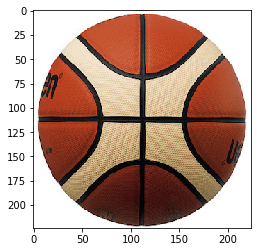

In [16]:
plt.imshow(x[0])

つぎに畳み込みのフィルターを作成します。

In [17]:
# convolution layerを用意
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=1, kernel_size=(3, 3), input_shape=(224, 224, 3))
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


さきほどの畳み込みフィルターを再現するために、Conv2Dと呼ばれるレイヤーを使います。Conv2Dとは2次元の畳み込みを意味します。Convというのが畳み込みの英語にあたるConvolutionの略で、2Dは2次元を意味します。Conv2Dを使って今回使用する引数としては、第一引数からそれぞれ、畳み込みフィルターの数が1つ、フィルターのサイズにあたるカーネルサイズが３×３、画像の入力の形が244×244でカラーなのでRGBの3チャネルであることを指定しています。

このように畳み込み層を用意してあげると、以下のように畳み込みフィルターのそれぞれの値はランダムに適当なものが入ります。



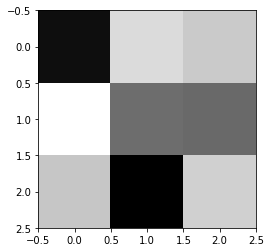

In [19]:
plt.imshow(np.squeeze(model.layers[0].get_weights()[0])[0], cmap='gray')

今回は特別に、さきほどバスケットボールの画像を用いた畳み込みフィルターの効果を見ていただくために、この畳み込みフィルターを強制的に設定するところをお見せします。普段の畳み込み処理では今から説明するget_weightsからset_weightsを用いた処理を行う部分は行いませんのでその点はご注意ください。
set_weightsというメソッドを用いて手動で畳み込みフィルターの配列を取りこみます。


In [0]:
# 左側が明るくて右側が暗いエッジを検出するフィルター
w1 = np.array([[[1], [2], [1]],
               [[0], [0], [0]],
               [[-1], [-2], [-1]]],
              dtype='float32') 
# 簡単のためRGBチャンネル全て同じフィルターとする
w1 = np.array([w1, w1, w1])

つぎにここではさきほどお見せした左側が明るかったら大きい値を返すような左のエッジを検出するための畳み込みフィルターの値をnp.arrayクラスを使って設定します。最後にset_weightsメソッドを使ってその畳み込みフィルターの配列を設定し、その畳み込みフィルターについて再度imshowメソッドを使って可視化しています。

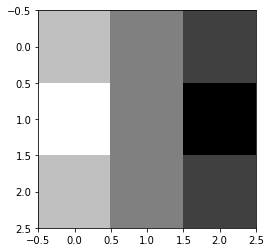

In [24]:
# 先ほど用意したconvolution layerにフィルターをセット
b = np.array([0.], dtype='float32')  # バイアスは0
model.layers[0].set_weights([w1, b])
# フィルターの可視化
plt.imshow(np.squeeze(model.layers[0].get_weights()[0])[0].T, cmap='gray')

つぎにpredictメソッドを用いてモデルの予測を行ったあと、畳み込みフィルターで変換された画像を見やすくするために、フィルター化された画像の画素をそれぞれフィルター化された画素の最大値で割った値に変換してimshowメソッドで可視化を行うという処理を行っています。このような処理をすると最終的にさきほどお見せした以下の画像が得られます。

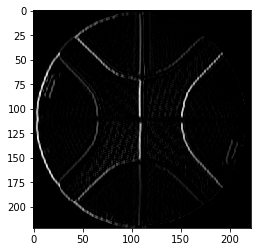

In [25]:
filtered = model.predict(x)
filtered /= np.max(filtered)
# plt.imshow(filtered[0], cmap='gray', vmin=0, vmax=255)
plt.imshow(np.squeeze(filtered), cmap='gray', vmin=0, vmax=1)

実際にステップバイステップで畳み込みのフィルターがどのような演算をしているかお目にかかる機会も少ないのではないかと思います。ほかの畳み込みフィルターについてもサンプルコードに含まれておりますので、興味がある方はぜひご自身で動かしてみてください。

## ストライドとパディングについて
取り込んだ画像に対して畳み込みフィルターをずらしながら畳み込み処理を行っていく必要があります。この時、ストライドとパディングというパラメータを設定します。具体的に畳み込みフィルターをずらしていくための動作を理解しておくことで、実践でのパラメータ設定の参考にしてください。

### ストライドとパディングの動き
ストライドはどのくらいのステップで畳み込みフィルターを動かすかを決める値です。ストライドを`stride=(1,1)`のように設定した場合では、一番左上から横方向に１ピクセルずつ畳み込みフィルターを動かしていって、右上の端までいったら次１個下のピクセルに進んで再度左端から同じ処理を繰り返していきます。
`stride=(2,2)`の場合は、1個飛ばしで進んでいくということを指定しています。

![stride11](https://github.com/kmotohas/shuwa-book-dl4prac-examples/blob/master/notebooks/figures/chap02_stride11.png?raw=1)
<center>stride=(1, 1)の場合の畳み込みフィルターの動き</center>

![stride22](https://github.com/kmotohas/shuwa-book-dl4prac-examples/blob/master/notebooks/figures/chap02_stride22.png?raw=1)
<center>stride=(2, 2)の場合の畳み込みフィルターの動き</center>

勘のいい読者の方は気づかれているかと思いますが、画像の端のピクセルに対しては畳み込みフィルターを使って計算することができません。端のピクセルに畳み込みフィルターを当てはめようとすると、フィルターが画像からはみ出てしまうからです。それをあえて以下の図のように画像の周りに０の値を埋めて（パディングして）あげて端から畳み込みの計算を行うということも非常によく行われています。このようにすることで端のピクセルに対しても畳み込みの計算ができるようになります。

![stride11_padding](https://github.com/kmotohas/shuwa-book-dl4prac-examples/blob/master/notebooks/figures/chap02_stride11_padding.png?raw=1)
<center>パディングを用いた場合の畳み込みフィルターの動き</center>

ディープラーニングフレームワークを使って畳み込みニューラルネットワークを触っていくときに、いきなりストライドやパディングが出てくると理解が難しいと思いますが、今の説明の通りやっていることは非常に単純ですので、怖がる必要はまったくありません。

### Max Poolingとは

最大値プーリングという言い方もされますが、図のように４×4の入力画像があったとします。その中の２×２の領域を取ってきてそれの最大値を出力するというそれだけの機能です。たとえば図の赤枠の２×２の行列であれば、各要素の中で右下の192という値が最大値なので192が出力されます。同様に右上の２×２の行列では最大値は144、それ以降も同様に図の右の２×２の行列のような数値がMax Poolingを行うことによって得られます。これは入力の行列の中から一番特徴的な値としてこの場合は最大値だけを取ってくる仕組みです。Max Poolingにはノイズを除去したり余計なものを見なくしたりするといった効果があります。

![max_pooling](https://github.com/kmotohas/shuwa-book-dl4prac-examples/blob/master/notebooks/figures/chap02_max_pooling.png?raw=1)
<center>Max Poolingの説明</center>

ここまでの部分を理解いただけるとディープラーニングの入り口にたどり着くことができます。

以下では、具体的なモデルの例としてAlexNetについて説明します。

AlexNetは2012年のImageNetという大規模な画像のデータセットを使って正解率を競うコンペティションで優勝したモデルです。AlexNetという名は設計者のAlex Krizhevskyさんに由来します。ImageNetのデータセットには1,400万枚以上の画像が収録されており、カテゴリ数は2万種類以上あります。コンペティションで利用されたデータセットでは、画像データは100万枚を超え、犬、猫、車など1000個以上のカテゴリのラベルがついています。それぞれの画像の形は224×224×3です。図のAlexNetはそれらの画像を左の層から取り込んで右に処理が進んでいくように描かれているため、その順番で説明します。

一番左の板状の形がその画像の形を示しています。次の箱が48個の畳み込みフィルターを用いた畳み込み処理の部分を示しています。その出力結果に対してMax Poolingの計算を行って、さらに128個の畳み込みフィルターを用いて畳み込み計算を行いMax Poolingを行うというような処理を進めていきます。最終的に分類を行うために全結合ニューラルネットワークのDense Layerにつなげてあげて1000個の分類を行う、というようなネットワークです。

![alexnet](https://github.com/kmotohas/shuwa-book-dl4prac-examples/blob/master/notebooks/figures/chap02_alexnet.png?raw=1)
<center>AlexNetのアーキテクチャー</center>

図のように畳み込み層、Max Poolingを繰り返し、最後に全結合ニューラルネットワークで分類するというような形は広く利用されているもので、いわゆる畳み込みネットワークというとこういう構造をしていることが多いです。というより、AlexNetは様々な畳み込みニューラルネットワークのお手本として参考にされています。

## 層を深くすると何がうれしいか
ディープラーニングはその名の通りニューラルネットワークの層を深くしたものです。ここでは層を深くする意味について、各層の学習結果を見ていくことで具体的にイメージができるようにしましょう。

### それぞれの層で学習される特徴の違い
以下は厳密なものではなく、イメージを掴むための簡易的な解説であることにご注意ください。たとえば図の左上のようにニコちゃんマークのような丸に目と口がある画像があるとします。さきほどの畳み込みフィルターの例で見ていただいたように、最初に畳み込み処理を行うと、図の1段目の例のようにエッジという画像のあいまいな形というか画像の特徴となる部分を抽出できます。次の層では、それをまた入力として畳み込み処理を行うとさらに細かい特徴を抽出できます。図の上から2段目の層をみていただくとわかる通り、真ん中が丸に近いとか、上が半月に近いとか、左が半月に近いとかドーナッツ型というように一段目より細部にわたった特徴量を抽出することができます。畳み込みを重ねていくことで、だんだんと画像の表現をつかむための特徴量を、内部で細かく抽出していくことができます。最終的に多段の畳み込みで抽出した細かい特徴を入力として、全結合ニューラルネットワークを使って分類を行うというのが、さきほどのAlexNetに代表される畳み込みニューラルネットのアーキテクチャになります。

![conv_features_abst](https://github.com/kmotohas/shuwa-book-dl4prac-examples/blob/master/notebooks/figures/chap02_conv_features_abst.png?raw=1)
<center>それぞれの層の特徴量の抽出イメージ</center>

次にどのような特徴量が得られているかについて、もう少し複雑なデータセットに対して見ていきます。

下図のサンプルコードでは、データセットとして馬と人間を含んだ多量の画像を使用します。このデータセットを入力として馬か人かを当てるようなニューラルネットワークを作ってみます。

最初に馬と人のデータセットを取り込んで、最初の10個の馬の名前を出力しています。
